In [1]:
import pandas as pd
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df_data=pd.DataFrame(df)
df_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df_data.shape

(1338, 7)

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
df_data['sex']=df_data['sex'].astype('category')
df_data['smoker']=df_data['smoker'].astype('category')
df_data['region']=df_data['region'].astype('category')

In [15]:
df_data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [16]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [17]:
smoker_data=df_data.groupby('smoker').mean(numeric_only=True).round(2)
smoker_data

C:\Users\Chishty Computer\AppData\Local\Temp\ipykernel_1800\2864742880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoker_data=df_data.groupby('smoker').mean(numeric_only=True).round(2)


,age,bmi,children,charges
smoker,,,,
no,39.39,30.65,1.09,8434.27
yes,38.51,30.71,1.11,32050.23


In [18]:
import seaborn as sns
sns.set_style('whitegrid')

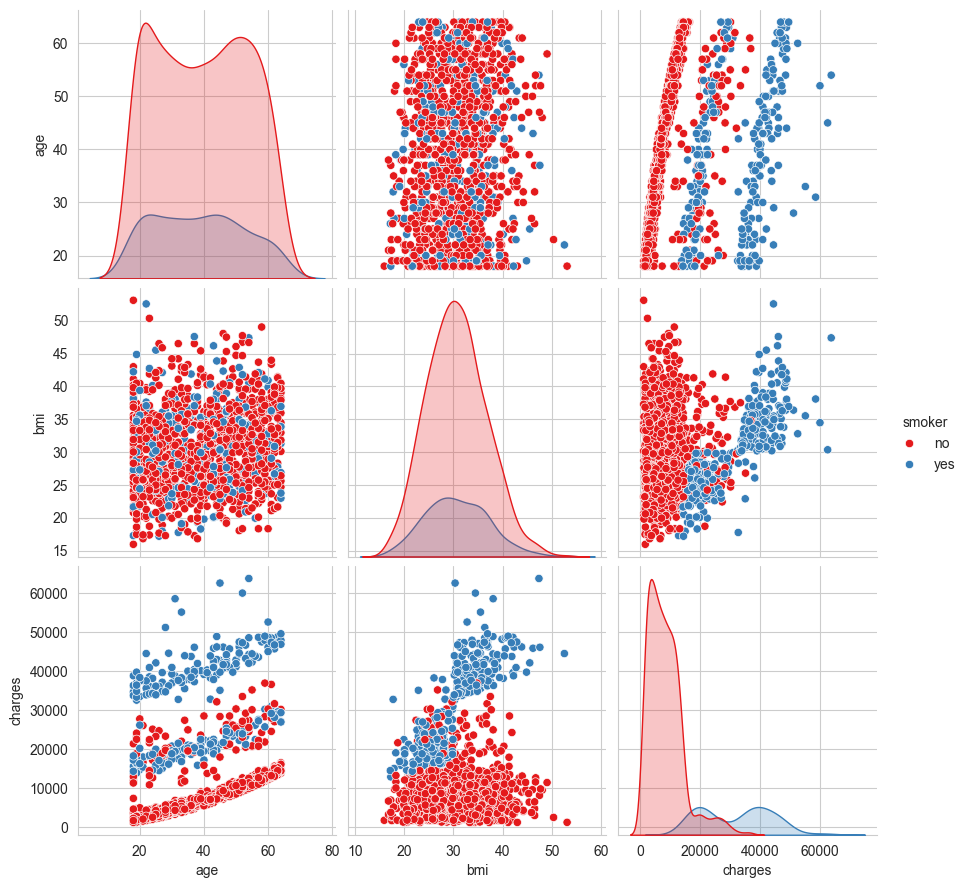

In [19]:
sns.pairplot(
    df_data[['age','bmi','charges','smoker']],
    hue='smoker',
    height=3,
    palette='Set1'
)

<Axes: >

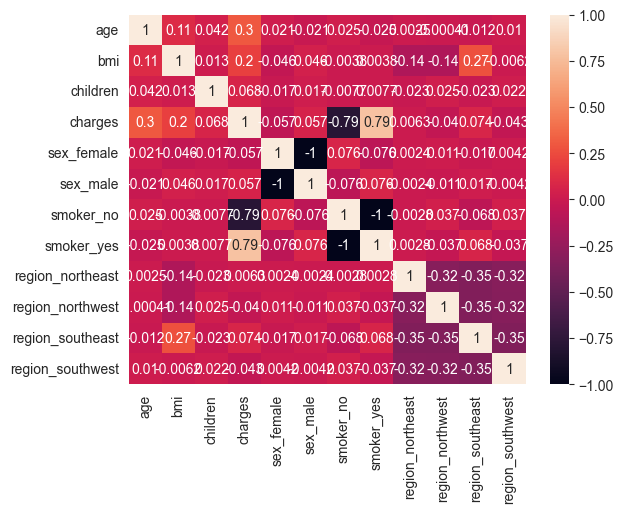

In [20]:
# A heatmap visually represents data using colors to show the intensity of values, often used to highlight correlations or patterns within a dataset.
df_data=pd.get_dummies(df_data)
sns.heatmap(df_data.corr(),annot=True)



In [21]:
df_data.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [22]:
# Building a regression model
y=df_data['charges']


In [23]:
X=df_data.drop('charges',axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=1
)


In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr.score(X_test,y_test)*100

76.23311844057112

In [28]:
lr.score(X_train,y_train)*100

74.77680686451552

In [43]:
# model prediction
data_new=X_train[:1]
lr.predict(data_new)

array([10508.41885042])

In [45]:
y_train[:1]

216    10355.641
Name: charges, dtype: float64

In [55]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=lr.predict(X_test)
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("R2 Score:",r2_score(y_test,y_pred))

Mean Squared Error: 35479352.80730363
R2 Score: 0.7623311844057112


In [24]:
# from sklearn.model_selection import KFold,cross_val_score
# kf=KFold(n_splits=5,shuffle=True,random_state=42)
# # scores=cross_val_score(lr,X,y,cv=kf, scoring='r2')*100



In [25]:
# import numpy as np
# np.mean(scores)

74.01956629640443

In [31]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression

# lr=LinearRegression()
# param_grid={
#     'fit_intercept':[True,False],
    
# }
# grid_search=GridSearchCV(estimator=lr,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

# grid_search.fit(X_train,y_train)

# print("Best Parameter",grid_search.best_params_)
# print("Best Score",grid_search.best_score_)


Best Parameter {'fit_intercept': True}
Best Score -37459548.293940194
